In [1]:
import pandas as pd
import tweepy as twt

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import string

In [3]:
#Twitter API credentials
consumer_key = "ZAa6hqVE88oCp1lQRWODLXkro"
consumer_secret = "btyRPEiNQarg2aW9XUj1jEC9LtLtJLUTpgU7eUJTCIlykbEDeo"
access_key = "592627235-najJYsIZ8fQuhHIou9i7P8yRQ52V9FP5cpgB4MPL"
access_secret = "qJPtVAnoFWVAh6sAbuLIjM1iZ0U0nGNYF0LIGJGqWmbHC"

In [4]:
auth = twt.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_key, access_secret)
api = twt.API(auth)

In [5]:
def get_all_tweets(screen_name):
    alltweets = []
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))  
        
    outtweets = [[tweet.created_at,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.geo,tweet.id_str,tweet.lang,tweet.place,tweet.retweet_count,tweet.retweeted,tweet.source,tweet.text,
                  tweet._json["user"]["location"],tweet._json["user"]["name"],tweet._json["user"]["time_zone"],
                  tweet._json["user"]["utc_offset"]] for tweet in alltweets]
    
    import pandas as pd
    tweets_df = pd.DataFrame(columns = ["time","hashtags","user_mentions","favorite_count",
                                    "geo","id_str","lang","place","retweet_count","retweeted","source",
                                    "text","location","name","time_zone","utc_offset"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in outtweets])
    tweets_df["hashtags"] = pd.Series([str(i[1]) for i in outtweets])
    tweets_df["user_mentions"] = pd.Series([str(i[2]) for i in outtweets])
    tweets_df["favorite_count"] = pd.Series([str(i[3]) for i in outtweets])
    tweets_df["geo"] = pd.Series([str(i[4]) for i in outtweets])
    tweets_df["id_str"] = pd.Series([str(i[5]) for i in outtweets])
    tweets_df["lang"] = pd.Series([str(i[6]) for i in outtweets])
    tweets_df["place"] = pd.Series([str(i[7]) for i in outtweets])
    tweets_df["retweet_count"] = pd.Series([str(i[8]) for i in outtweets])
    tweets_df["retweeted"] = pd.Series([str(i[9]) for i in outtweets])
    tweets_df["source"] = pd.Series([str(i[10]) for i in outtweets])
    tweets_df["text"] = pd.Series([str(i[11]) for i in outtweets])
    tweets_df["location"] = pd.Series([str(i[12]) for i in outtweets])
    tweets_df["name"] = pd.Series([str(i[13]) for i in outtweets])
    tweets_df["time_zone"] = pd.Series([str(i[14]) for i in outtweets])
    tweets_df["utc_offset"] = pd.Series([str(i[15]) for i in outtweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df


In [6]:
dia = get_all_tweets("deespeak")

...400 tweets downloaded so far
...599 tweets downloaded so far
...799 tweets downloaded so far
...998 tweets downloaded so far
...1197 tweets downloaded so far
...1396 tweets downloaded so far
...1596 tweets downloaded so far
...1795 tweets downloaded so far
...1994 tweets downloaded so far
...2194 tweets downloaded so far
...2394 tweets downloaded so far
...2594 tweets downloaded so far
...2794 tweets downloaded so far
...2994 tweets downloaded so far
...3193 tweets downloaded so far
...3224 tweets downloaded so far
...3224 tweets downloaded so far


In [7]:
dia

,time,hashtags,user_mentions,favorite_count,geo,id_str,lang,place,retweet_count,retweeted,source,text,location,name,time_zone,utc_offset
0,2021-01-04 06:17:32,[],"[{'screen_name': 'kirubamunusamy', 'name': 'Ki...",0,None,1345977645117292544,en,None,243,False,Twitter for iPhone,RT @kirubamunusamy: ‘Learn English’\n\nThrow a...,India,Dia Mirza,None,None
1,2021-01-03 07:38:51,[],[],327,None,1345635720678027264,en,None,17,False,Twitter for iPhone,Thank you Adar! This is wonderful news 🙏🏻👍🏼 Co...,India,Dia Mirza,None,None
2,2021-01-02 11:32:50,[],"[{'screen_name': 'tanmay_shinde99', 'name': 'T...",25,None,1345332217757667328,en,None,1,False,Twitter for iPhone,@tanmay_shinde99 @parents4future @GretaThunber...,India,Dia Mirza,None,None
3,2021-01-01 15:11:24,[],[],1333,None,1345024836087660544,en,None,66,False,Twitter for iPhone,Help Heal Our Planet by choosing to\n🌱 Follow ...,India,Dia Mirza,None,None
4,2021-01-01 12:17:07,[],[],3611,None,1344980976145899521,en,None,85,False,Twitter for iPhone,Love love and more love for everyONE 💜 Have a ...,India,Dia Mirza,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,2019-01-14 15:15:57,"[{'text': 'KaifiAzmi', 'indices': [52, 62]}]",[],629,None,1084831491115401216,lv,None,36,False,Twitter for iPhone,"A magical, powerful, profound experience. Homa...",India,Dia Mirza,None,None
3220,2019-01-14 06:27:20,"[{'text': 'MakarSankranti', 'indices': [16, 31]}]","[{'screen_name': 'wti_org_india', 'name': 'Wil...",1162,None,1084698460031471616,en,None,164,False,Twitter for iPhone,As we celebrate #MakarSankranti do keep this i...,India,Dia Mirza,None,None
3221,2019-01-14 06:03:43,"[{'text': 'KanhaNationalPark', 'indices': [10,...",[],739,None,1084692517071843328,en,None,44,False,Twitter for iPhone,Thank you #KanhaNationalPark for making me a p...,India,Dia Mirza,None,None
3222,2019-01-13 15:47:08,"[{'text': 'climatechange', 'indices': [126, 14...",[],0,None,1084476952449245185,en,None,378,False,Twitter for iPhone,RT @UNEnvironment: Forests 🌴🌳🌲\nAct as a sourc...,India,Dia Mirza,None,None


In [8]:
text = dia.text

In [9]:
text

0       RT @kirubamunusamy: ‘Learn English’\n\nThrow a...
1       Thank you Adar! This is wonderful news 🙏🏻👍🏼 Co...
2       @tanmay_shinde99 @parents4future @GretaThunber...
3       Help Heal Our Planet by choosing to\n🌱 Follow ...
4       Love love and more love for everyONE 💜 Have a ...
                              ...                        
3219    A magical, powerful, profound experience. Homa...
3220    As we celebrate #MakarSankranti do keep this i...
3221    Thank you #KanhaNationalPark for making me a p...
3222    RT @UNEnvironment: Forests 🌴🌳🌲\nAct as a sourc...
3223    RT @vivek4wild: Happy to be back in #Bhopal fo...
Name: text, Length: 3224, dtype: object

In [10]:
string = " ".join(text)

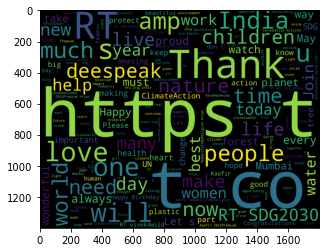

In [11]:
wordcloud = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(string)

plt.imshow(wordcloud)

In [12]:
words = string.split(" ")

In [13]:
positive_words=pd.read_csv("E:/DataScience/Assignments/TextMining/positive-words.txt",error_bad_lines=False)

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


In [14]:
pos = positive_words.values

In [15]:
pos = pd.DataFrame(pos, columns=['text'] )

In [16]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)


In [19]:
pos['text'] = pos.text.apply(clean)
pos.text

0                                                        
1                                opinion lexicon positive
2                                                        
3        this file contains a list of positive opinion...
4                                                        
                              ...                        
2026                                             youthful
2027                                                 zeal
2028                                               zenith
2029                                                 zest
2030                                                zippy
Name: text, Length: 2031, dtype: object

In [20]:
post = pos.values

In [21]:
t_pos = " ".join ([w for w in words if w in post])

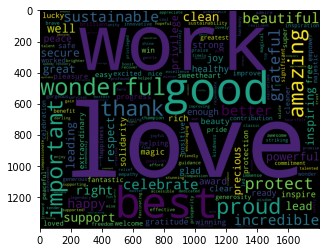

In [22]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(t_pos)

plt.imshow(wordcloud_pos)

In [23]:
negative_words=pd.read_csv("E:/DataScience/Assignments/TextMining/negative-words.txt",error_bad_lines=False, encoding='latin')

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


In [24]:
negative_words

,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4803,zaps
4804,zealot
4805,zealous
4806,zealously


In [25]:
neg = negative_words.values

In [26]:
neg = pd.DataFrame(neg, columns=['text'])

In [27]:
import string
import re

In [28]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [29]:
neg['text'] = neg.text.apply(clean)
neg.text

0                                                        
1                                opinion lexicon negative
2                                                        
3        this file contains a list of negative opinion...
4                                                        
                              ...                        
4803                                                 zaps
4804                                               zealot
4805                                              zealous
4806                                            zealously
4807                                               zombie
Name: text, Length: 4808, dtype: object

In [30]:
negt = neg.values

In [31]:
t_neg = " ".join ([w for w in words if w in negt])

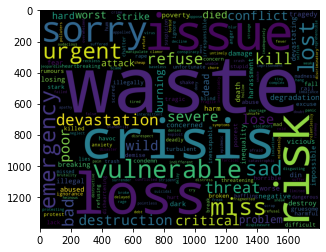

In [32]:
wordcloud = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(t_neg)

plt.imshow(wordcloud)

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [34]:
nlp = spacy.load('en')

In [35]:
one_block = text[10]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [36]:
one_block

'Hope you had the most wonderful #Christmas i had the most magical day in the forest 🐯💚🌏🎄 Love,\nPeace and Joy for AL… https://t.co/hFkUk1GeP1'

In [37]:
for token in doc_block[0:50]:
    print(token, token.pos_)

Hope VERB
you PRON
had AUX
the DET
most ADV
wonderful ADJ
# SYM
Christmas PROPN
i PRON
had AUX
the DET
most ADV
magical ADJ
day NOUN
in ADP
the DET
forest NOUN
🐯 NOUN
💚 NUM
🌏 PROPN
🎄 PROPN
Love PROPN
, PUNCT

 SPACE
Peace PROPN
and CCONJ
Joy PROPN
for ADP
AL PROPN
… PUNCT
https://t.co/hFkUk1GeP1 ADV


In [38]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[1:25])

['day', 'forest', '🐯']


In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:30]

,word,count
0,hope,1
1,day,1
2,forest,1


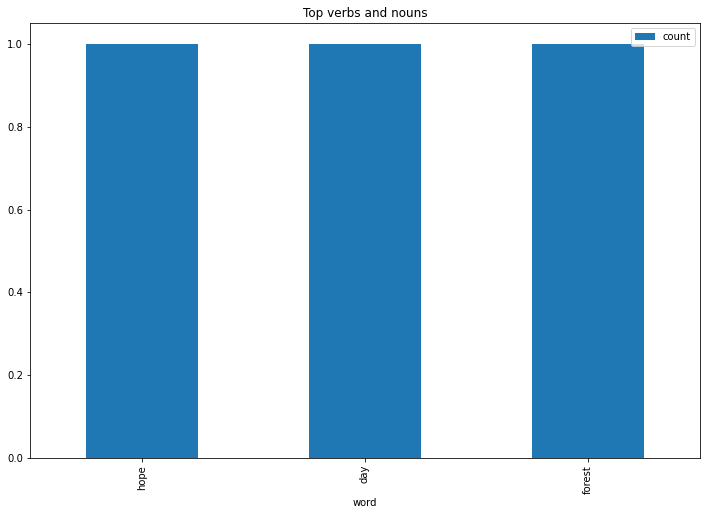

In [41]:
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [42]:
from nltk import tokenize

In [43]:
sentences = tokenize.sent_tokenize(" ".join(text))
sentences[5:15]

['#TideTurners #BeatPlasticPollution #SDGs  🌳🌏https://t.co/q4Gq4RnmuM Beautiful 🤩 https://t.co/NcLLrEi1mJ Eight years have come &amp; gone since the gruesome #Nirbhaya incident happened on 16 Dec 2012.',
 'But are women still saf… https://t.co/woqscOcbTR A change maker from India who has found a solution to one of our most severe environmental issues - #AirPollution… https://t.co/oAw1MliqjN Join the Together to #ENDviolence Solutions Summit Launch Event❗\n \nTogether, we will catalyse political &amp; financial… https://t.co/YacPomyuc6 If every nation including India declares a State Of Climate Emergency it will mobilise more #ClimateAction.',
 'I hope… https://t.co/eCiAhFou9e 🙏🏻🙏🏻 Love her https://t.co/rxZ07Q9nEX @Chinmay_TI So wonderful 💚 To reach the goal of zero emissions by 2050, urgent action is needed.',
 'The decisions we make now will impact the liv… https://t.co/YmSdmRVLAX Congratulations to all the amazing awardees for their service to humanity and the planet.',
 '🌍🌱 Each one

In [44]:
df = pd.DataFrame(sentences, columns=['sentence'])
df

,sentence
0,RT @kirubamunusamy: ‘Learn English’\n\nThrow a...
1,This is wonderful news 🙏🏻👍🏼 Congratulations to...
2,What a year this has been...
3,The moon has been a reminder of all that's gen...
4,It’s absolutely fantastic.
...,...
2514,“peḌ ke kāTne vāloñ ko y… https://t.co/S4rspau...
2515,Enjoy yourselves withou… https://t.co/KcZqiCuP...
2516,I will cherish every moment spent with these w...
2517,Come one come all!


In [45]:
afinn = pd.read_csv('E:/DataScience/Assignments/TextMining/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [46]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [47]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [48]:
nlp = spacy.load('en')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [49]:
calculate_sentiment(text = 'yummy')

3

In [50]:
df['sentiment_value'] = df['sentence'].apply(calculate_sentiment)

In [51]:
df['word_count'] = df['sentence'].str.split().apply(len)
df['word_count'].head(10)

0     25
1     99
2      6
3    157
4      3
5     23
6     60
7     24
8     24
9     35
Name: word_count, dtype: int64

In [52]:
df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
1024,Was in no network 😊 a beautiful forest in Maha...,16,39
1327,Is #India ready fo… RT @ArvindKejriwal: Proud ...,16,65
1988,#Kaafir @ZEE5Premium https://t.co/dXZ2LZWOxP T...,17,62
583,Together 🙏🏻 @OfficeofUT @AUThackeray @CMOMahar...,17,103
526,"Jungle #cat young found by villagers, given OR...",18,150
404,Caring #ForNature is caring… https://t.co/8Cm0...,20,79
1291,Thank you for remind us @RajkumarHirani #Chang...,20,87
676,These are extraordinary times and it requires…...,25,51
1,This is wonderful news 🙏🏻👍🏼 Congratulations to...,30,99
1023,Zara zara always ❤️🤗 https://t.co/1nezuhDgVq T...,32,92


In [53]:
df['sentiment_value'].describe()

count    2519.000000
mean        1.842001
std         3.526092
min       -12.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        32.000000
Name: sentiment_value, dtype: float64

In [54]:
df[df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
2,What a year this has been...,0,6
5,#TideTurners #BeatPlasticPollution #SDGs 🌳🌏ht...,0,23
6,But are women still saf… https://t.co/woqscOcb...,-1,60
9,🌍🌱 Each one of these… https://t.co/Rx1B8bnRz2 ...,0,35
19,Thank you @mybmc @DighavkarKiran for hel… http...,0,15


In [55]:
df[df['sentiment_value']>=20].head()

,sentence,sentiment_value,word_count
1,This is wonderful news 🙏🏻👍🏼 Congratulations to...,30,99
404,Caring #ForNature is caring… https://t.co/8Cm0...,20,79
676,These are extraordinary times and it requires…...,25,51
1023,Zara zara always ❤️🤗 https://t.co/1nezuhDgVq T...,32,92
1291,Thank you for remind us @RajkumarHirani #Chang...,20,87


In [56]:
df['index']=range(0,len(df))

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

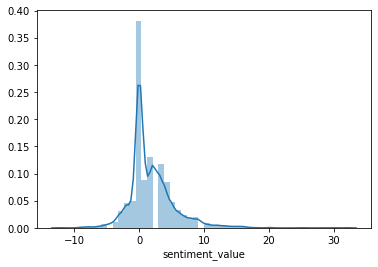

In [58]:
sns.distplot(df['sentiment_value'])

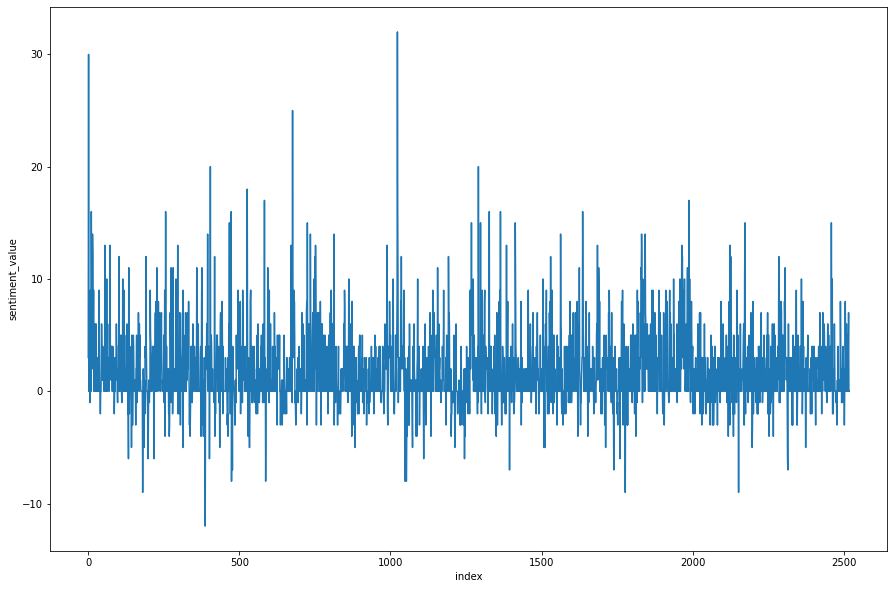

In [59]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=df)

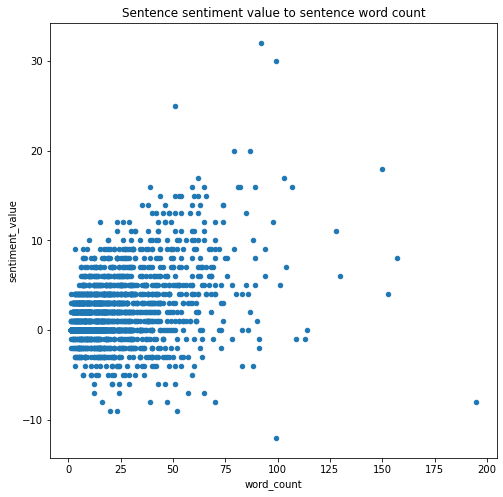

In [60]:
df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')